In [127]:
import pandas as pd
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib.pylab import style
style.use('ggplot')    
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False  

# 导入数据

In [61]:
df_category0920 = pd.read_csv('stat20200920/resolve_stat/gdl_jrs_msg_parse_baseline_2_3.csv',index_col = False)

In [100]:
def merge_df(dt):
    df_resolve_new = pd.read_csv(f'stat{dt}/resolve_stat/gdl_jrs_msg_parse_baseline_2_3.csv',
                             index_col = False)
    df_resolve_init = pd.read_csv('resolve/gdl_jrs_msg_parse_baseline_2_3.csv',index_col = False)
    df_resolve_init['table_name'] = 'gdl_jrs_msg_parse'
    df_resolve_new.drop_duplicates(inplace = True)
    df_resolve_init.drop_duplicates(inplace = True)
    df_resolve = df_resolve_init.append(df_resolve_new).sort_values('dt').reset_index(drop = True)
    df_resolve.drop_duplicates(inplace = True)
    df_resolve.to_csv('resolve/gdl_jrs_msg_parse_baseline_2_3.csv',index = False)
    return df_resolve

In [107]:
df_category = merge_df('20200920')

In [108]:
important_category = ['credit_card','bank_budget','other_budget','loan','business_insurance',
                      'gong_ji_jin','report']
other_import = ['chat','express','games','hotel','onlineshopping','recruit','takeoutfood',
                'taxi','tourism','yys']

In [111]:
df_category_import = df_category[df_category['category_2'].isin(important_category+other_import)]
category_list = pd.read_excel('category2_3.xlsx',index = False)
category_list.rename(columns = {"二级分类名称":"category_2","三级分类名称":"category_3"},inplace = True)
df_category_import = df_category_import.merge(category_list,on = ['category_2','category_3'],how = 'inner')[['category_2','二级分类含义','category_3','三级分类含义','total_num','unique_num','table_name','dt']]

In [133]:
date_start = '2019-03-01'
date_final = '2019-06-08'
def main(date_start,date_final):
    if not os.path.exists(f'result_excel/result_2_3'):
        os.mkdir(f'result_excel/result_2_3')
    if not os.path.exists(f'result_picture/result_2_3'):
        os.mkdir(f'result_picture/result_2_3')
    while date_start<date_final:
        print(date_start)
        date_start1 = datetime.strptime(date_start, "%Y-%m-%d")
        date_end = str(date_start1 - timedelta(days=-6))[:-9]
        df_category_import_week = df_category_import[(df_category_import['dt'] > date_start) & (df_category_import['dt'] < date_end)]
        df_category_import_week1 = df_category_import_week.groupby(['二级分类含义']).agg('sum')[['total_num','unique_num']].reset_index()
        df_category_import_week1['week'] = date_start
        with pd.ExcelWriter(f'result_excel/result_2_3/baseline_2_3_week.xlsx') as writer:
             df_category_import_week1.to_excel(writer,sheet_name = '各机构类型的短信和独立用户数',index = False)
        plt.figure(figsize=(10, 8), dpi=80)
        plt.bar(df_category_import_week1['二级分类含义'],df_category_import_week1['total_num'],color = "#87CEFA")
        plt.ylabel(f'{date_start}_{date_end}各机构类型的短信条数(亿)')
        for a,b in zip(df_category_import_week1['二级分类含义'],df_category_import_week1['total_num']):
            plt.text(a, b-0.3,'%.2f'%round(b/100000000,3), ha = 'center',va = 'bottom',fontsize=15)
        plt.savefig(f'result_picture/result_2_3/{date_start}_{date_end}_各行为的短信条数', dpi=300)
        plt.figure(figsize=(10, 8), dpi=80)
        plt.bar(df_category_import_week1['二级分类含义'],df_category_import_week1['unique_num'],color = "#87CEFA")
        plt.ylabel(f'{date_start}_{date_end}各机构类型的独立用户数(亿)')
        for a,b in zip(df_category_import_week1['二级分类含义'],df_category_import_week1['unique_num']):
            plt.text(a, b-0.3,'%.2f'%round(b/100000000,3), ha = 'center',va = 'bottom',fontsize=15)
        plt.savefig(f'result_picture/result_2_3/{date_start}_{date_end}_各行为的用户数', dpi=300)
        date_start = date_end

2019-03-01
2019-03-07
2019-03-13
2019-03-19
2019-03-25
2019-03-31
2019-04-06
2019-04-12
2019-04-18
2019-04-24
2019-04-30


E:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
E:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


2019-05-06
2019-05-12
2019-05-18
2019-05-24
2019-05-30
2019-06-05


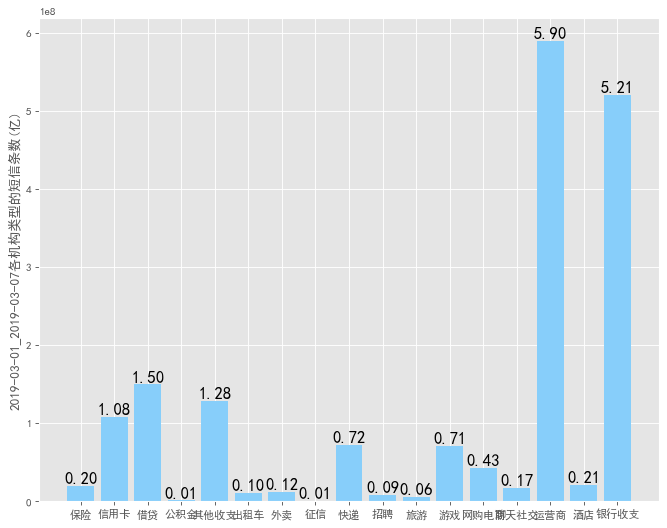

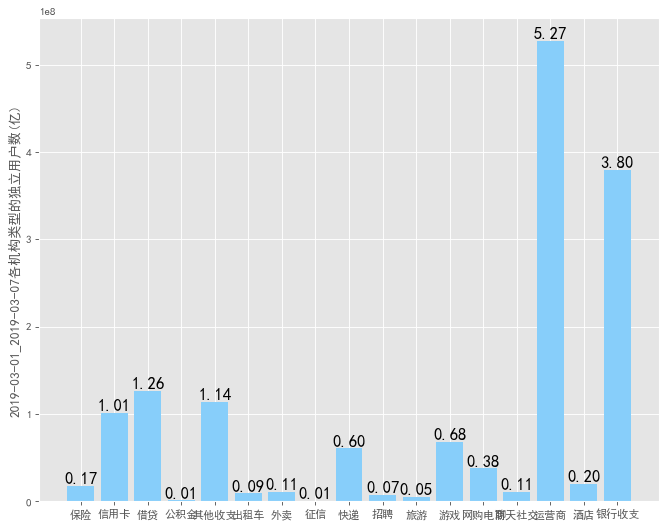

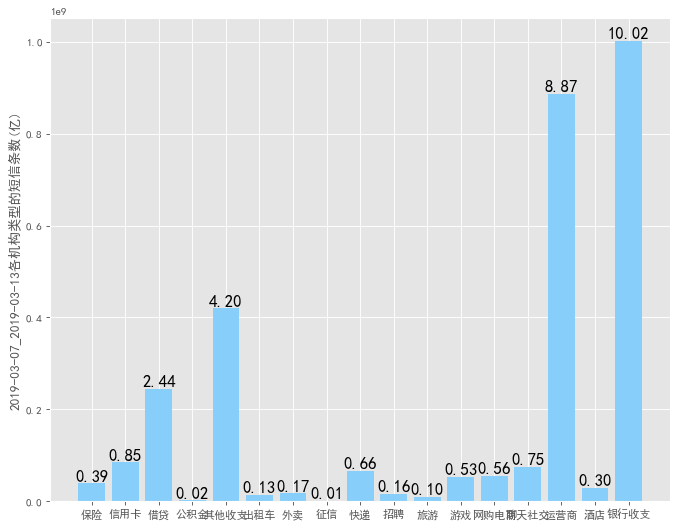

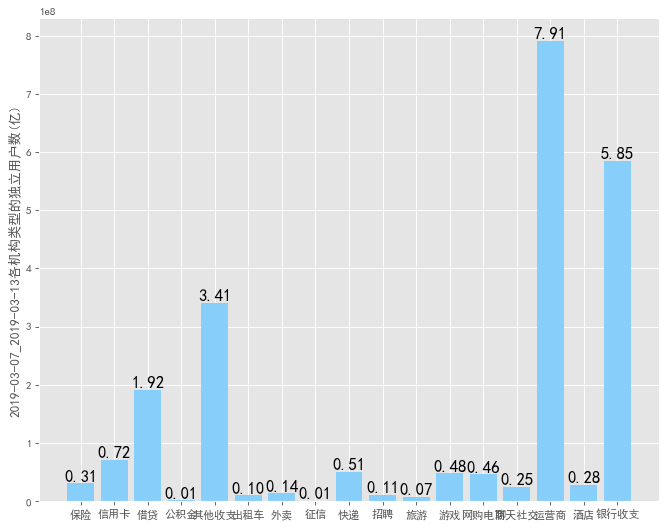

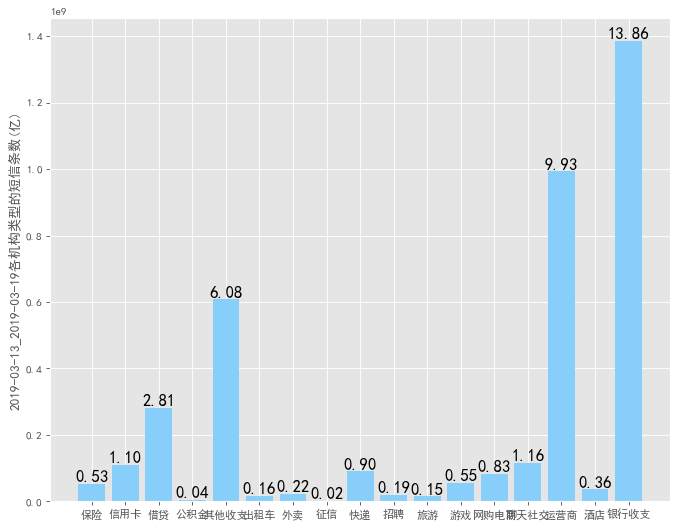

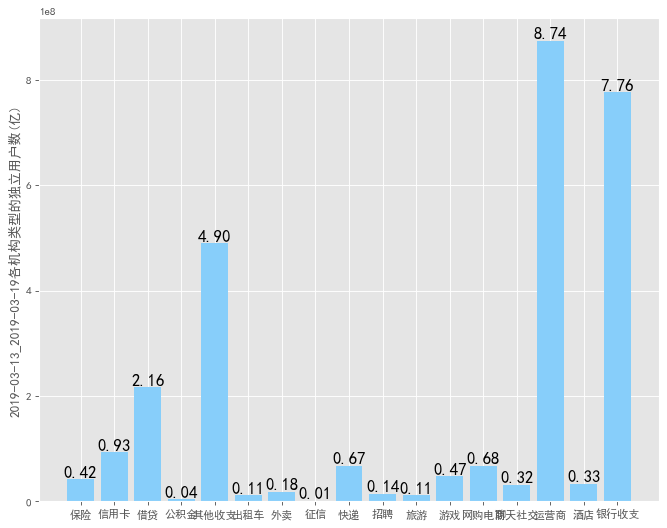

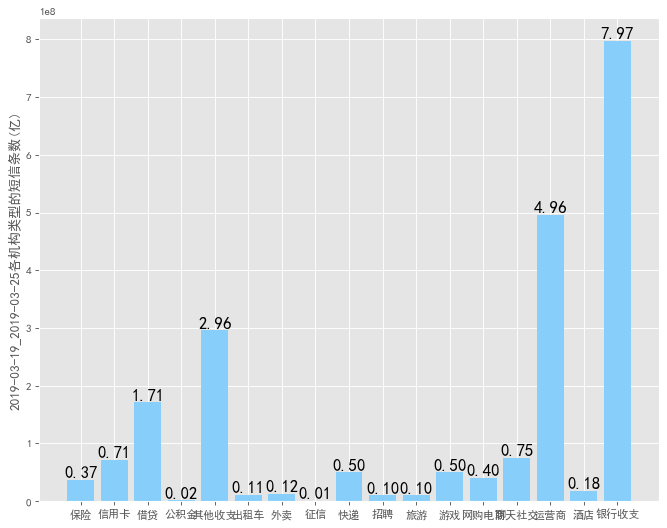

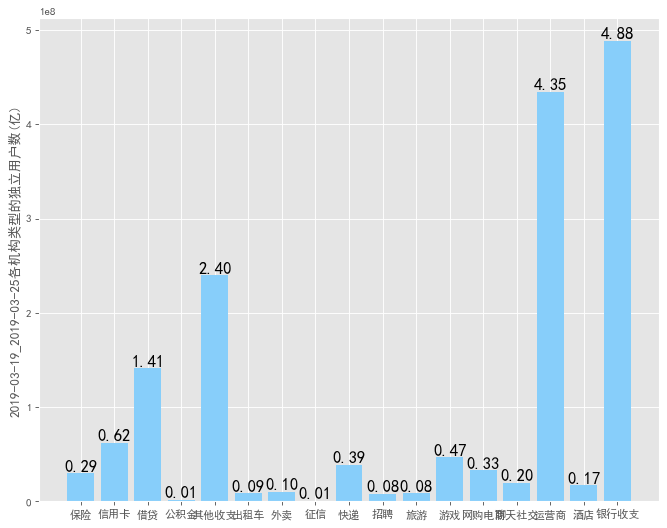

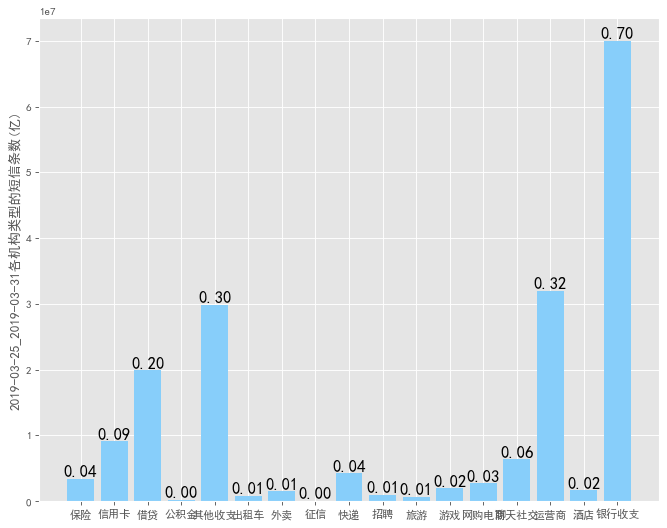

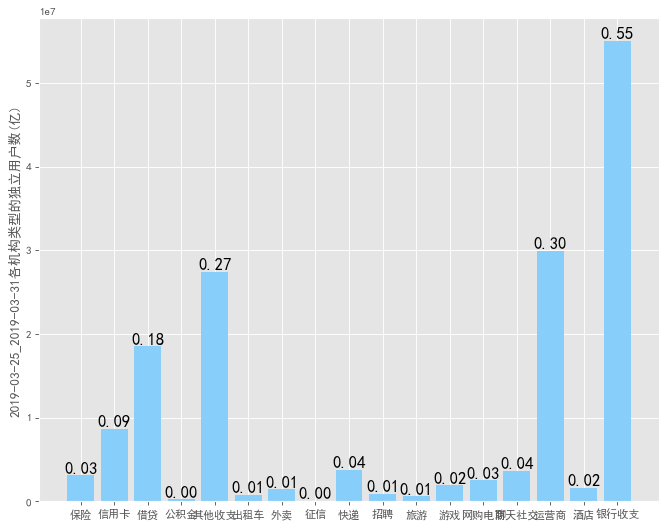

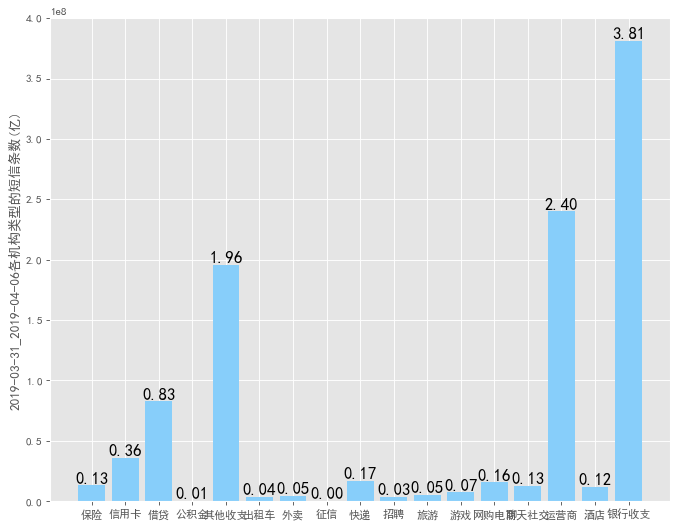

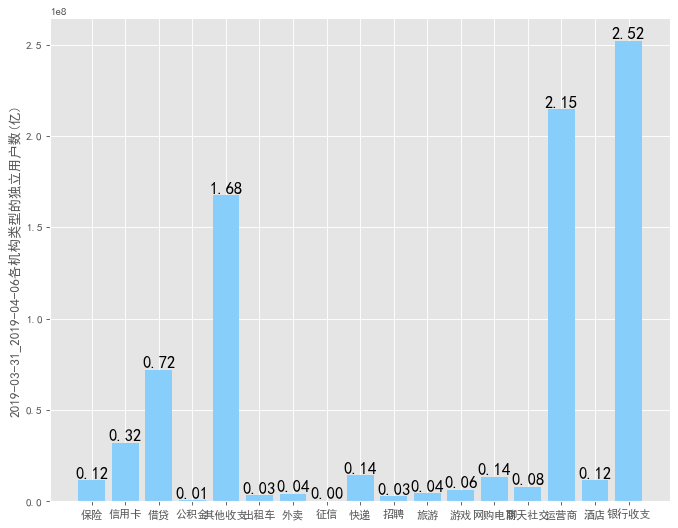

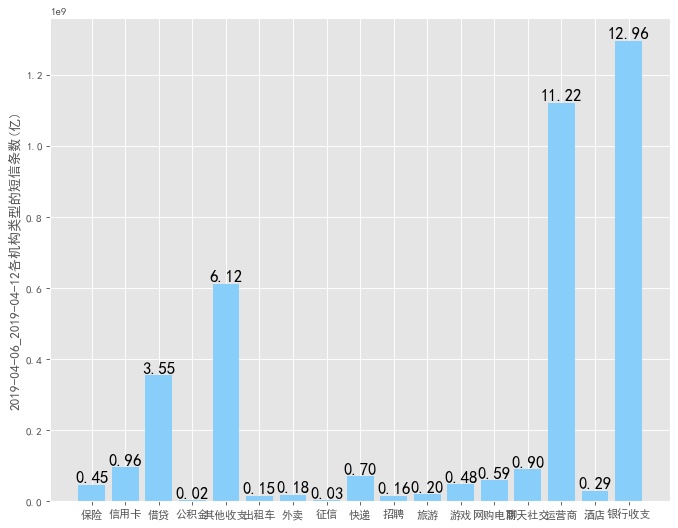

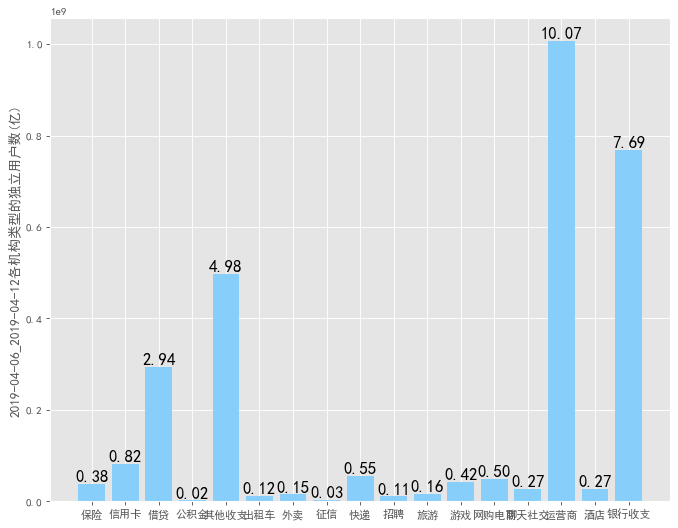

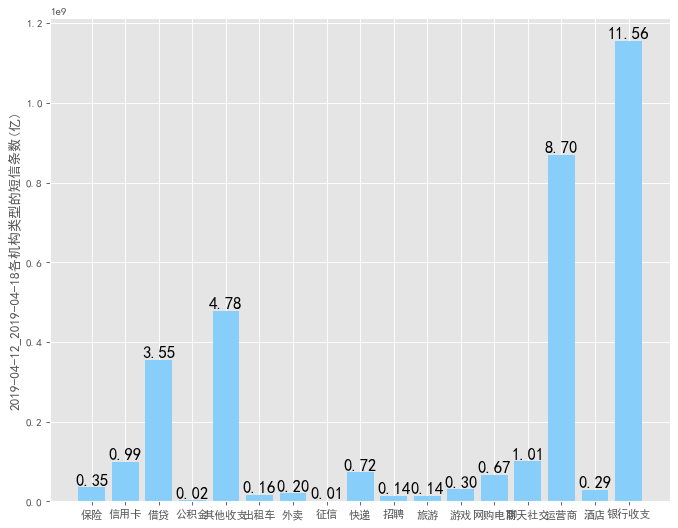

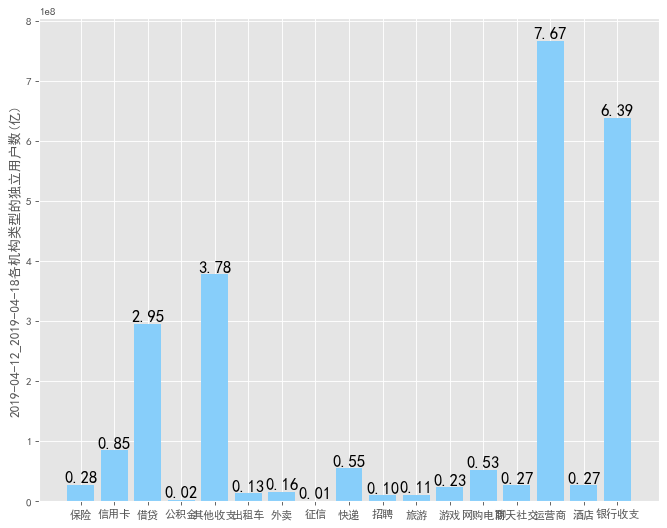

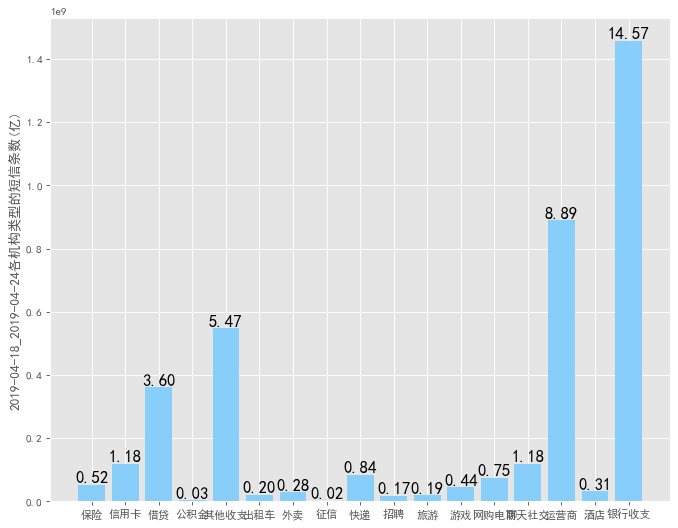

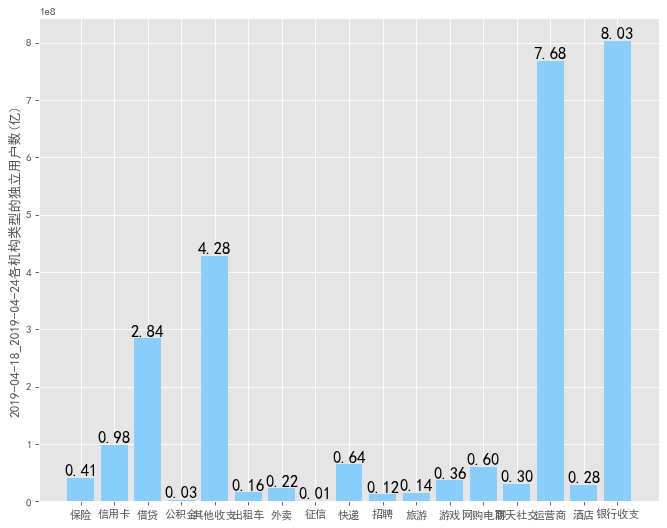

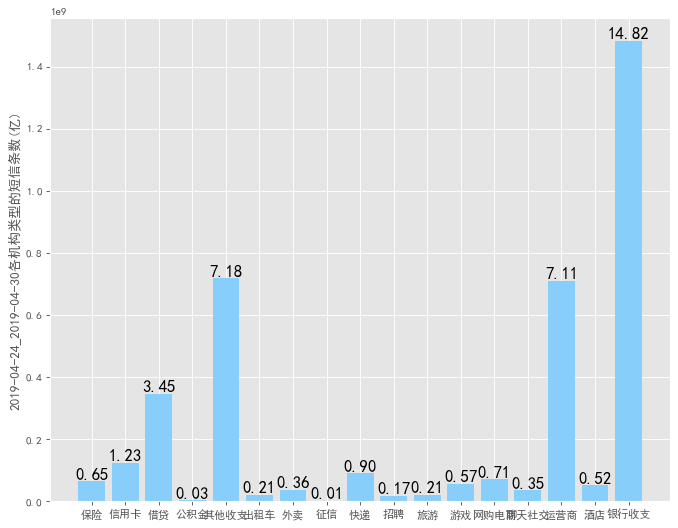

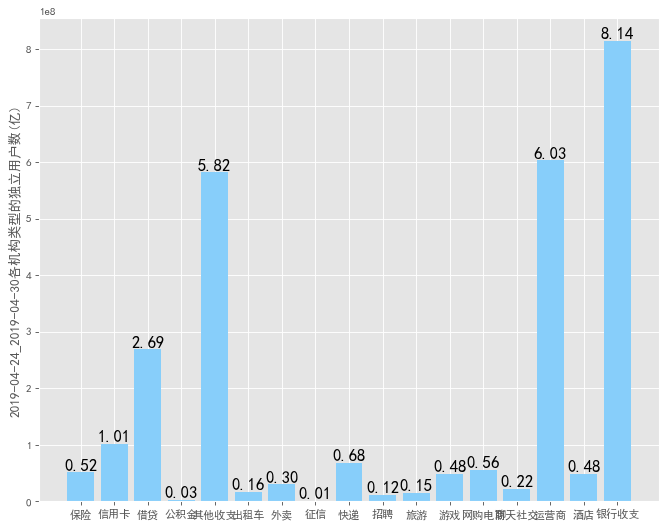

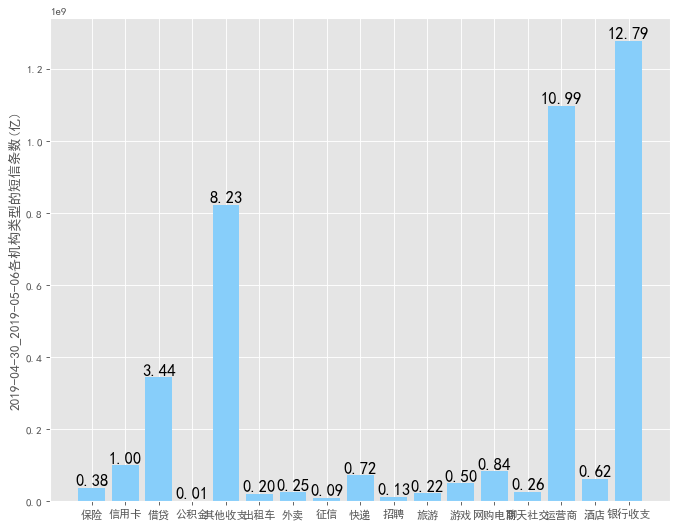

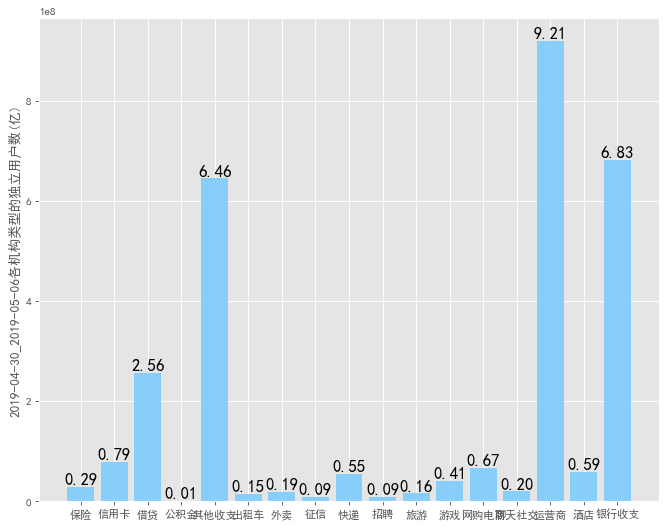

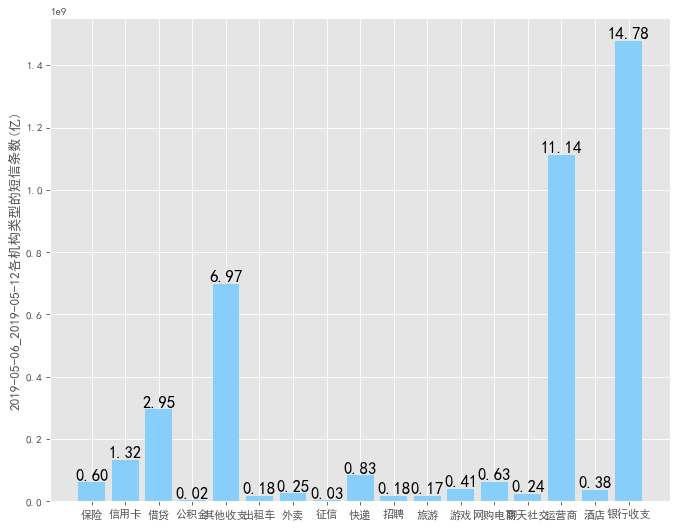

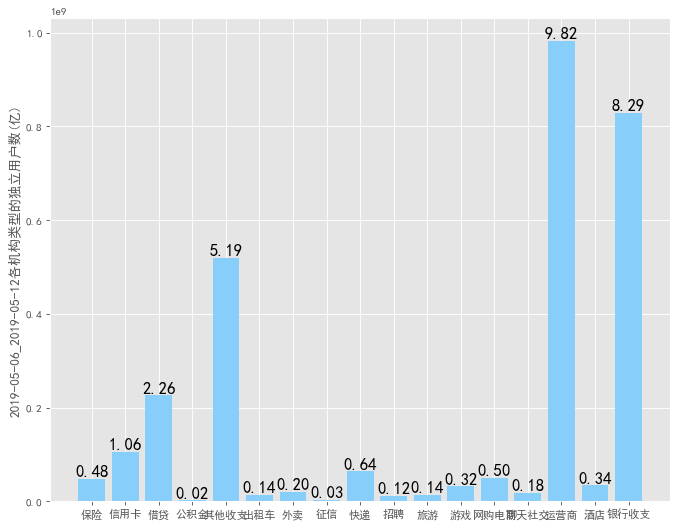

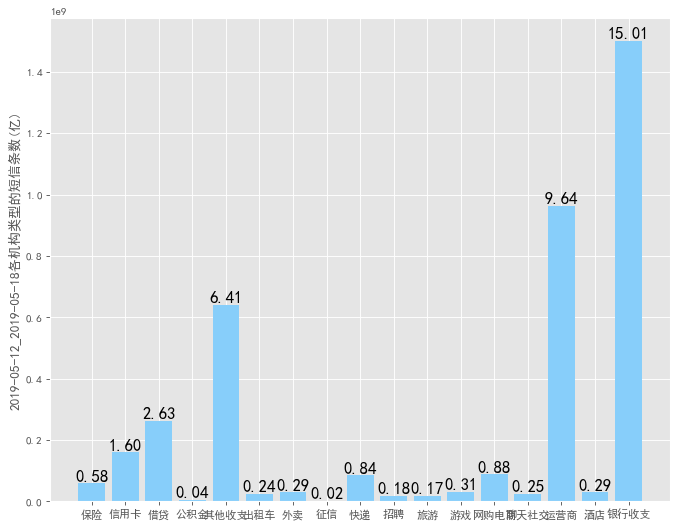

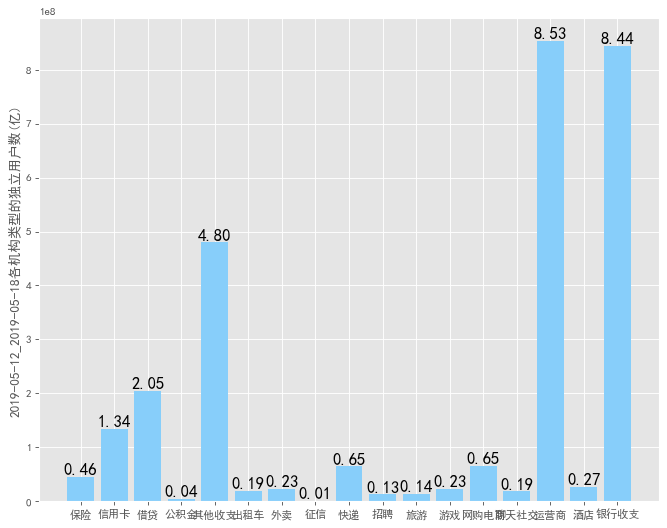

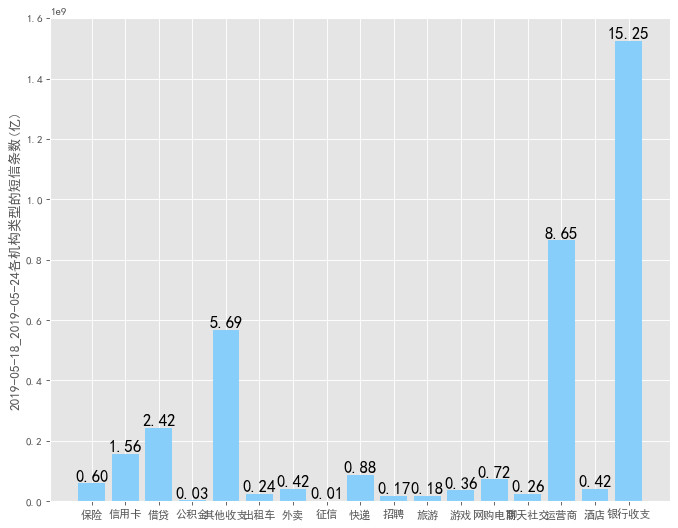

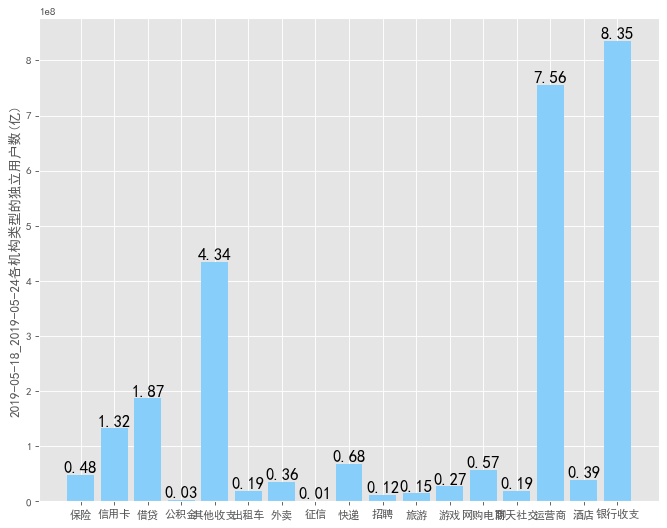

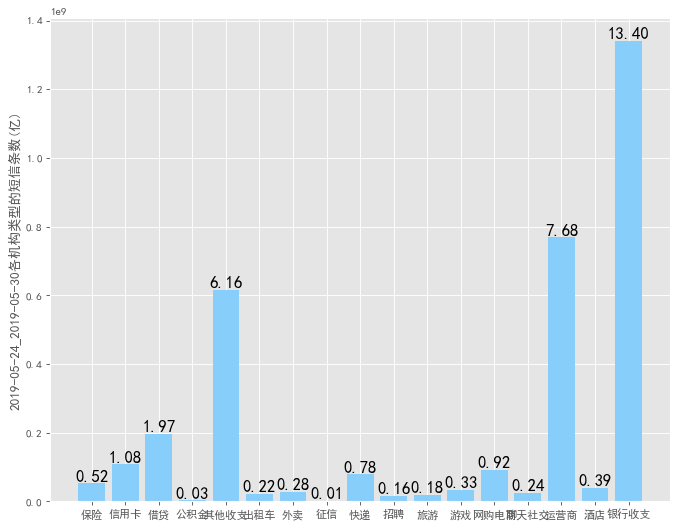

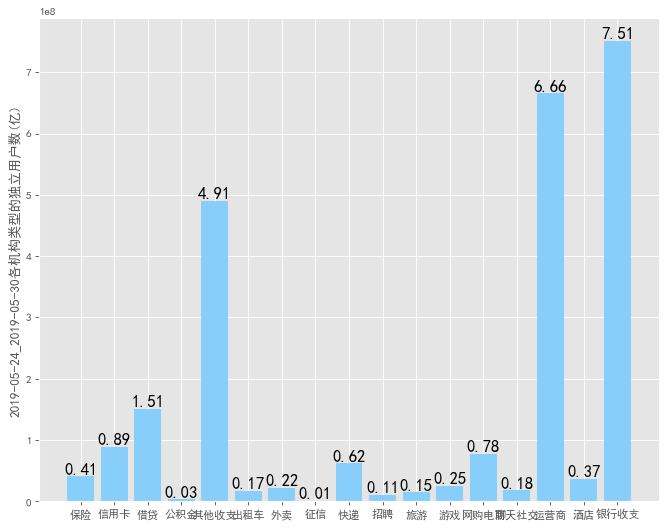

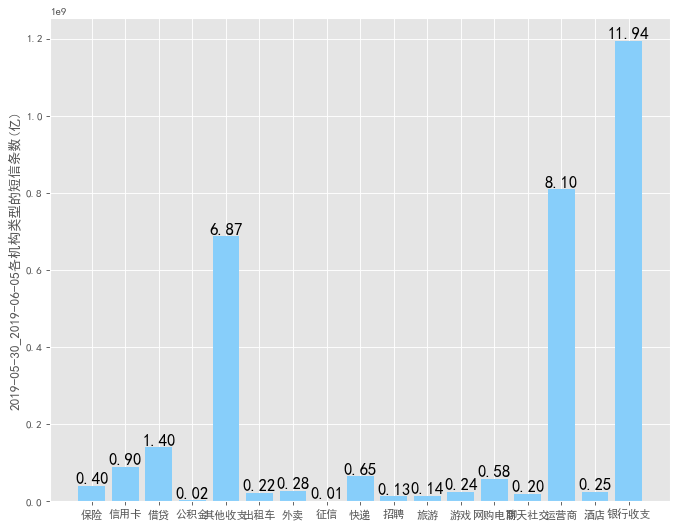

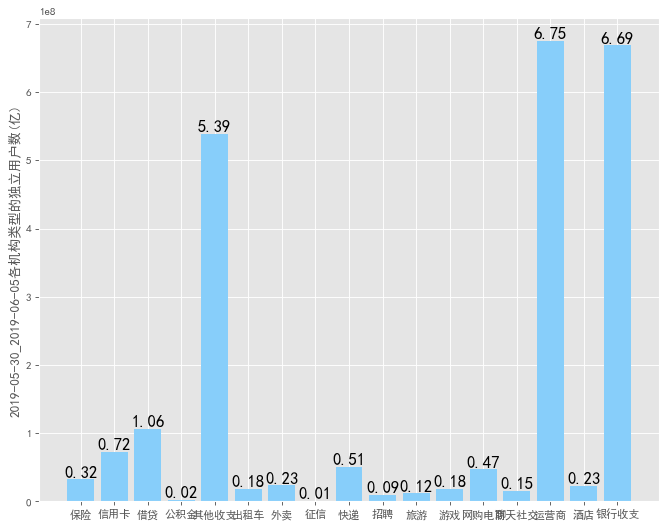

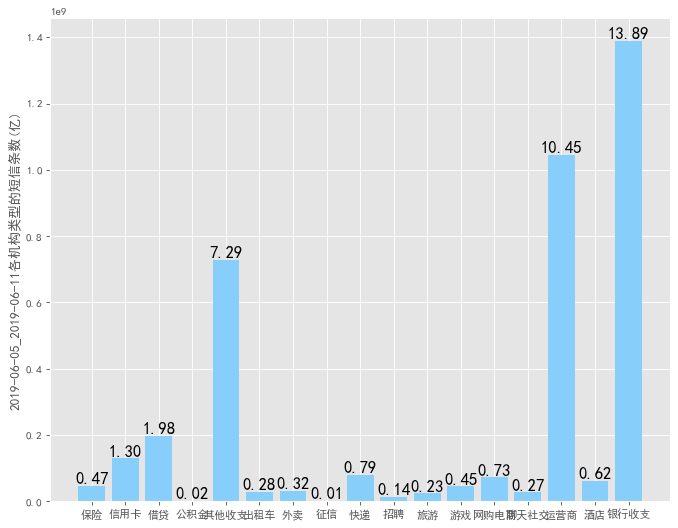

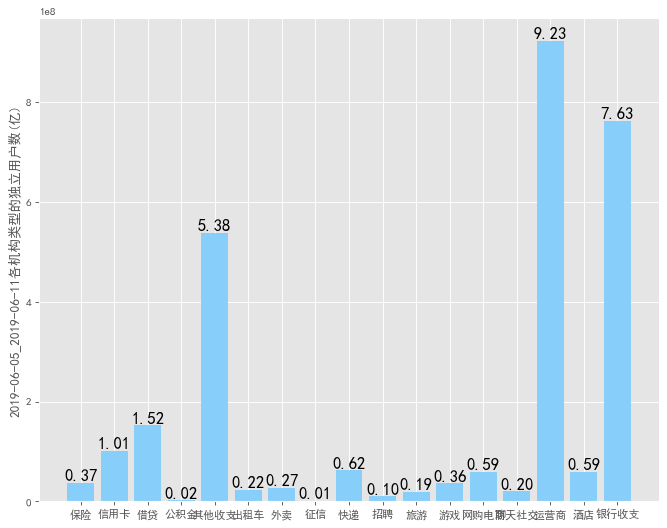

In [134]:
main(date_start,date_final)

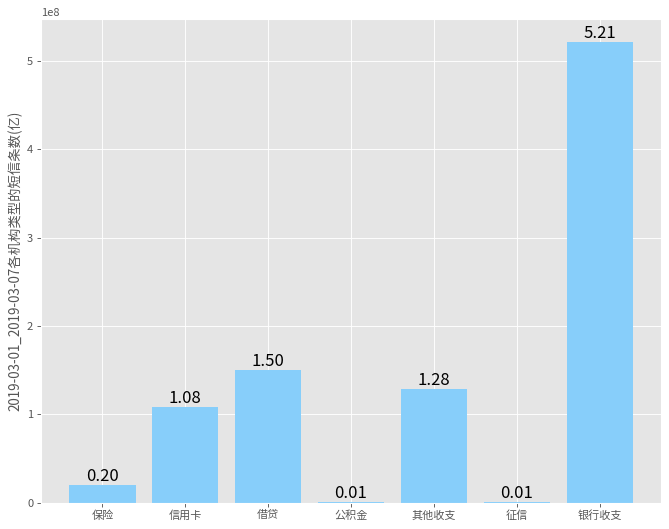

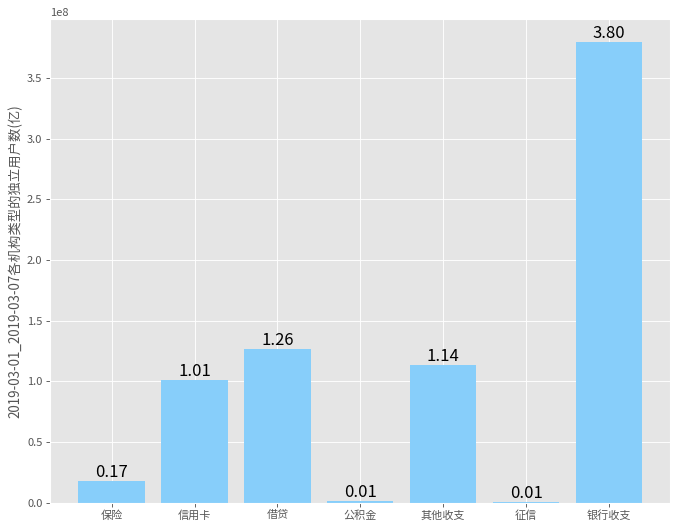

In [396]:
plt.figure(figsize=(10, 8), dpi=80)
plt.bar(df_category_import_week1['二级分类含义'],df_category_import_week1['unique_num'],color = "#87CEFA")
plt.ylabel(f'{dt_start}_{dt_end}各机构类型的独立用户数(亿)')
for a,b in zip(df_category_import_week1['二级分类含义'],df_category_import_week1['unique_num']):
    plt.text(a, b-0.3,'%.2f'%round(b/100000000,3), ha = 'center',va = 'bottom',fontsize=15)
# plt.savefig(f'result_picture/{date_start}_{date_end}_信用卡用户各行为的短信条数', dpi=300)

# 信用卡数据

In [318]:
df_category_credit_card = df_category_import[(df_category_import['category_2']=='credit_card') & (df_category_import['dt'] > dt_start) & (df_category_import['dt'] < dt_end)].sort_values(['dt','category_3']).reset_index(drop = True)

# 信用卡用户各行为分析

In [498]:
df_category_credit_card_3_all = df_category_credit_card.groupby(['三级分类含义']).agg('sum')[['total_num','unique_num']].reset_index()
df_category_credit_card_3_all['week'] = dt_start
df_category_credit_card_3 = df_category_credit_card_3_all[df_category_credit_card_3_all['三级分类含义']!='营销'].reset_index()

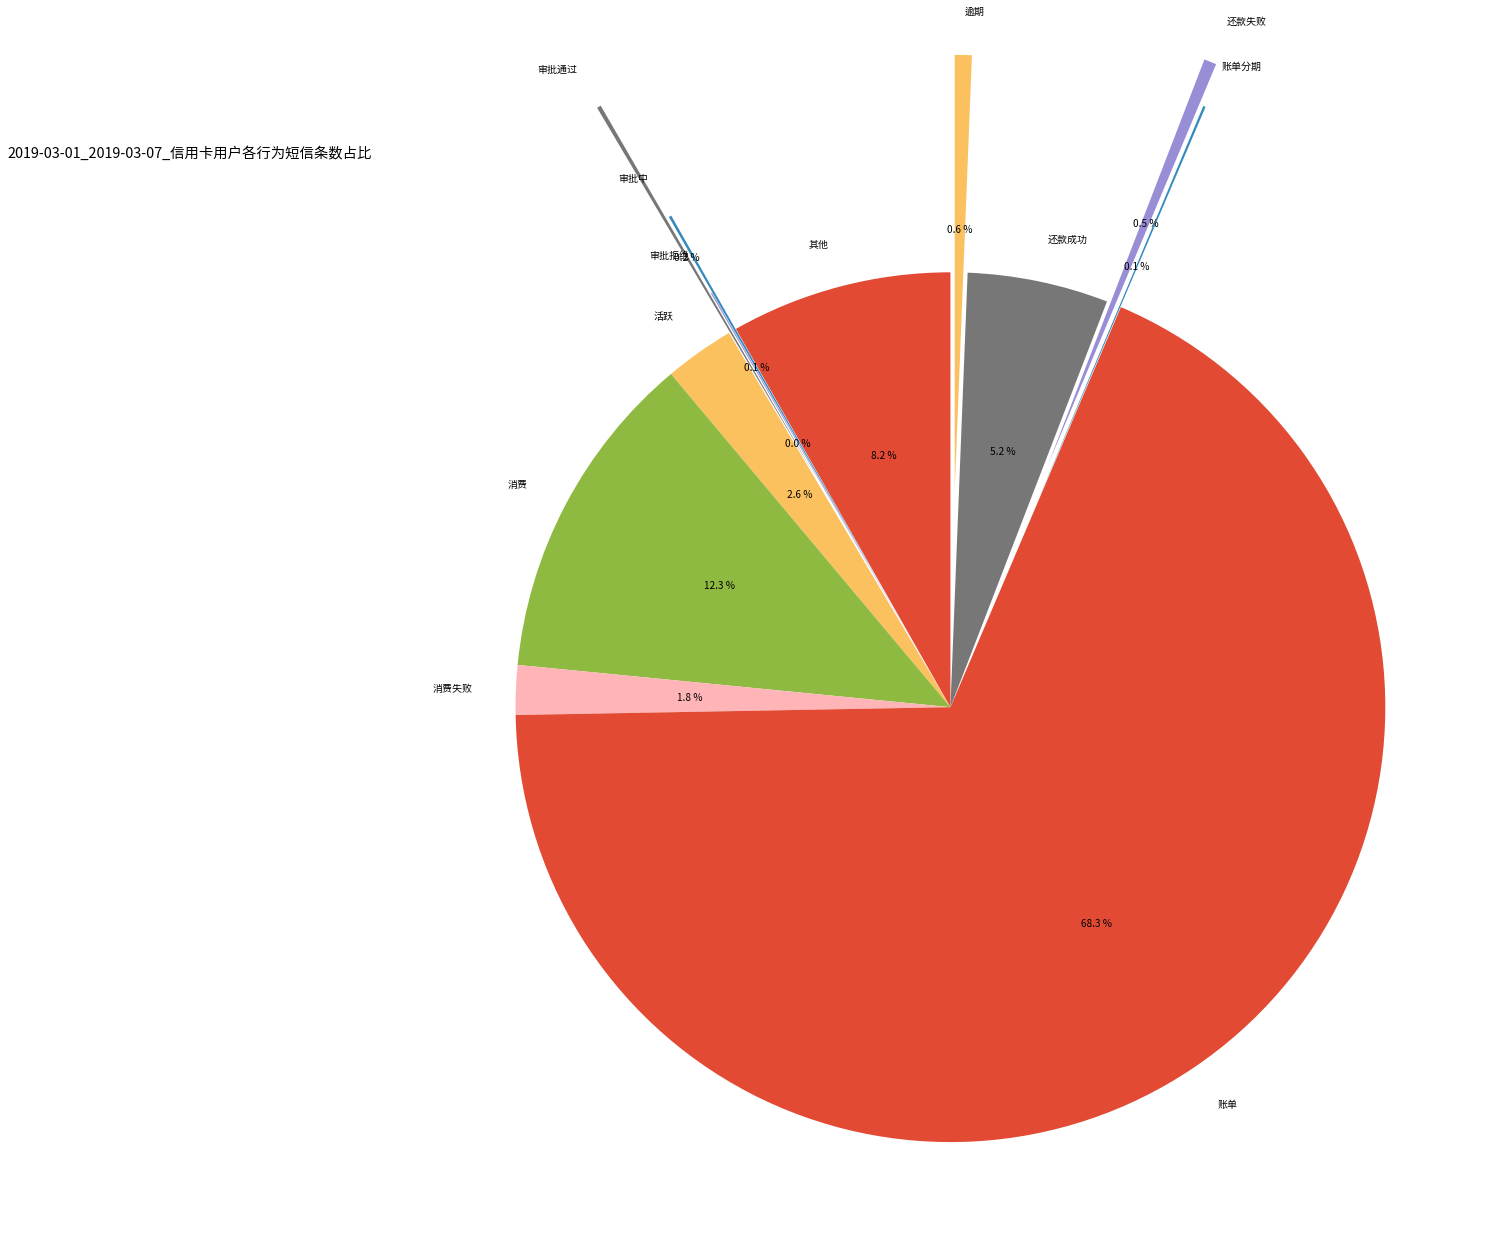

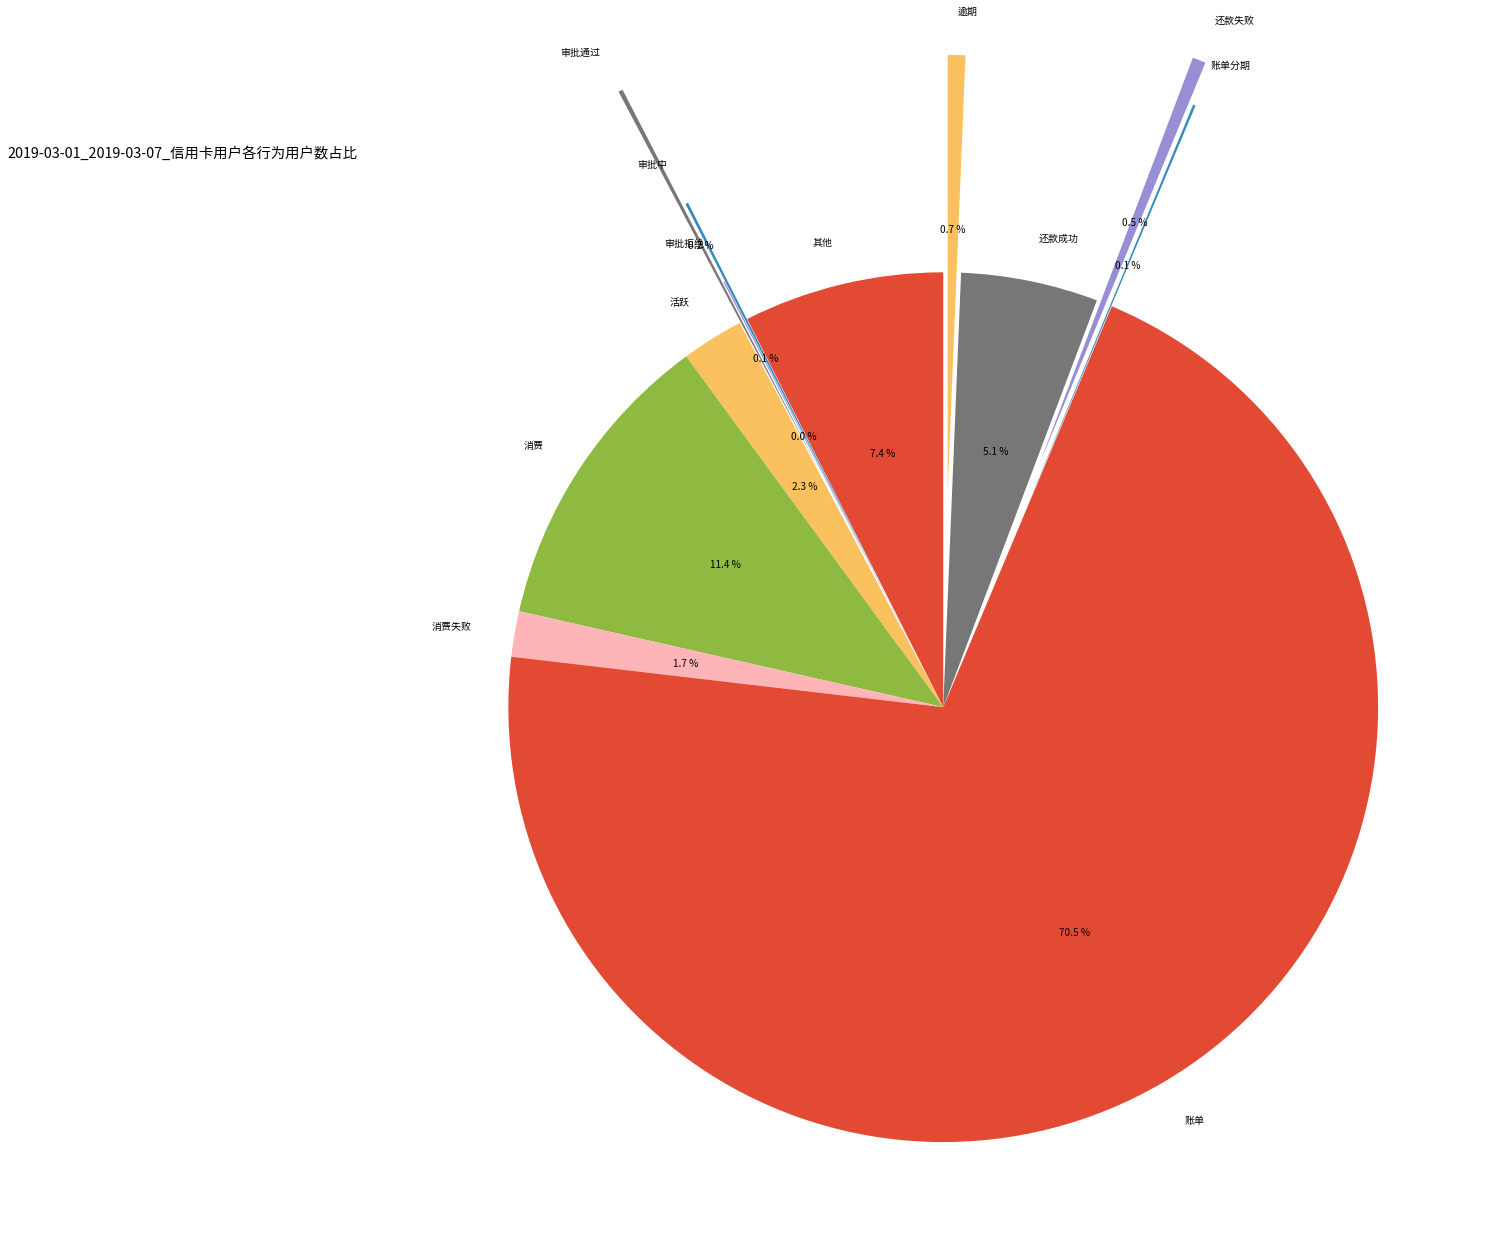

In [483]:
plt.figure(1,figsize=(20,20))#将画布设定为正方形，则绘制的饼图是正圆
plt.axes(aspect=1) 
plt.title(f'{dt_start}_{dt_end}_信用卡用户各行为短信条数占比',x = -0.2)#绘制标题
explode = (0.0 , 0.3 , 0.1, 0.6 , 0.0 ,0.0 , 0.0 , 0.0 , 0.5 , 0.6 , 0.0 , 0.5)
plt.pie(x = df_category_credit_card_3['total_num'],labels=df_category_credit_card_3['三级分类含义'],autopct='%3.1f %%',labeldistance=1.1, startangle=90, pctdistance=0.6,explode = explode)
plt.show()
plt.figure(1,figsize=(20,20))#将画布设定为正方形，则绘制的饼图是正圆
plt.axes(aspect=1) 
plt.title(f'{dt_start}_{dt_end}_信用卡用户各行为用户数占比',x = -0.2)#绘制标题
explode = (0.0 , 0.3 , 0.1, 0.6 , 0.0 ,0.0 , 0.0 , 0.0 , 0.5 , 0.6 , 0.0 , 0.5)
plt.pie(x = df_category_credit_card_3['unique_num'],labels=df_category_credit_card_3['三级分类含义'],autopct='%3.1f %%',labeldistance=1.1, startangle=90, pctdistance=0.6,explode = explode)
plt.show()

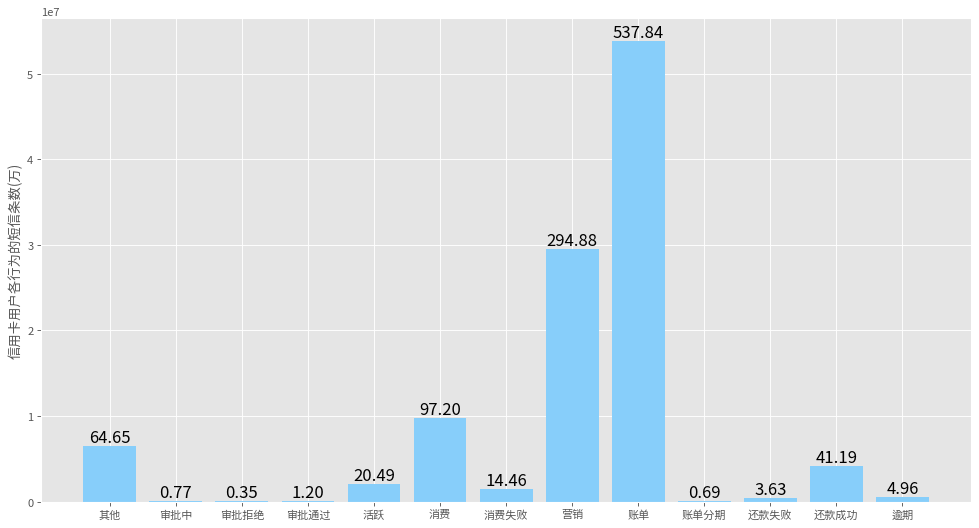

In [436]:
plt.figure(figsize=(15, 5), dpi=80)
plt.bar(df_category_credit_card_3['三级分类含义'],df_category_credit_card_3['total_num'],color = "#87CEFA")
plt.ylabel(u'信用卡用户各行为的短信条数(万)')
for a,b in zip(df_category_credit_card_3['三级分类含义'],df_category_credit_card_3['total_num']):
    plt.text(a, b-0.3,'%.2f'%round(b/100000,3), ha = 'center',va = 'bottom',fontsize=15)
# plt.savefig(f'result_picture/{date_start}_{date_end}_信用卡用户各行为的短信条数', dpi=300)

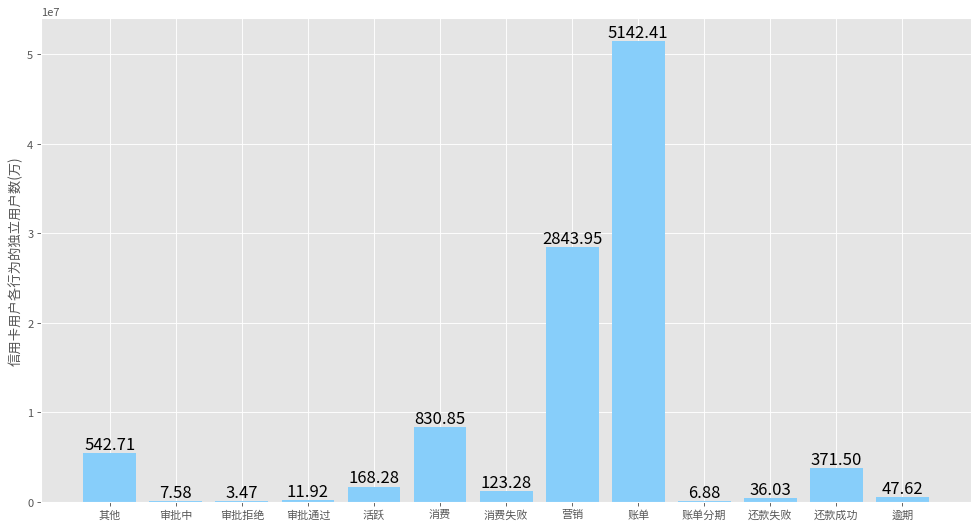

In [435]:
plt.figure(figsize=(15, 8), dpi=80)
plt.bar(df_category_credit_card_3['三级分类含义'],df_category_credit_card_3['unique_num'],color = "#87CEFA")
plt.ylabel(u'信用卡用户各行为的独立用户数(万)')
for a,b in zip(df_category_credit_card_3['三级分类含义'],df_category_credit_card_3['unique_num']):
    plt.text(a, b-0.3,'%.2f'%round(b/10000,3), ha = 'center',va = 'bottom',fontsize=15)
# plt.savefig(f'result_picture/{date_start}_{date_end}_信用卡用户各行为的短信条数', dpi=300)

# 借贷数据

In [189]:
df_category_loan = df_category_import[(df_category_import['category_2']=='loan') & (df_category_import['dt'] == dt_mon)].reset_index(drop = True)

# 借贷各用户各行为分析

In [499]:
df_category_loan_3_all = df_category_loan.groupby(['三级分类含义']).agg('sum')[['total_num','unique_num']].reset_index()
df_category_loan_3_all['week'] = dt_start

In [459]:
df_category_loan_3 = df_category_loan_3_all[df_category_loan_3_all['三级分类含义']!='营销'].reset_index()

In [460]:
df_category_loan_3

,index,三级分类含义,total_num,unique_num
0,0,其他,1735101,1532378
1,1,审批拒绝,307459,262995
2,2,审批通过,3342104,3072860
3,3,展期,3983,3472
4,4,放款失败,78225,76668
5,5,放款成功,714491,613481
6,6,注册,303926,272316
7,7,申请,765973,660383
8,9,还款失败,636821,500133
9,10,还款成功,1367263,1195739


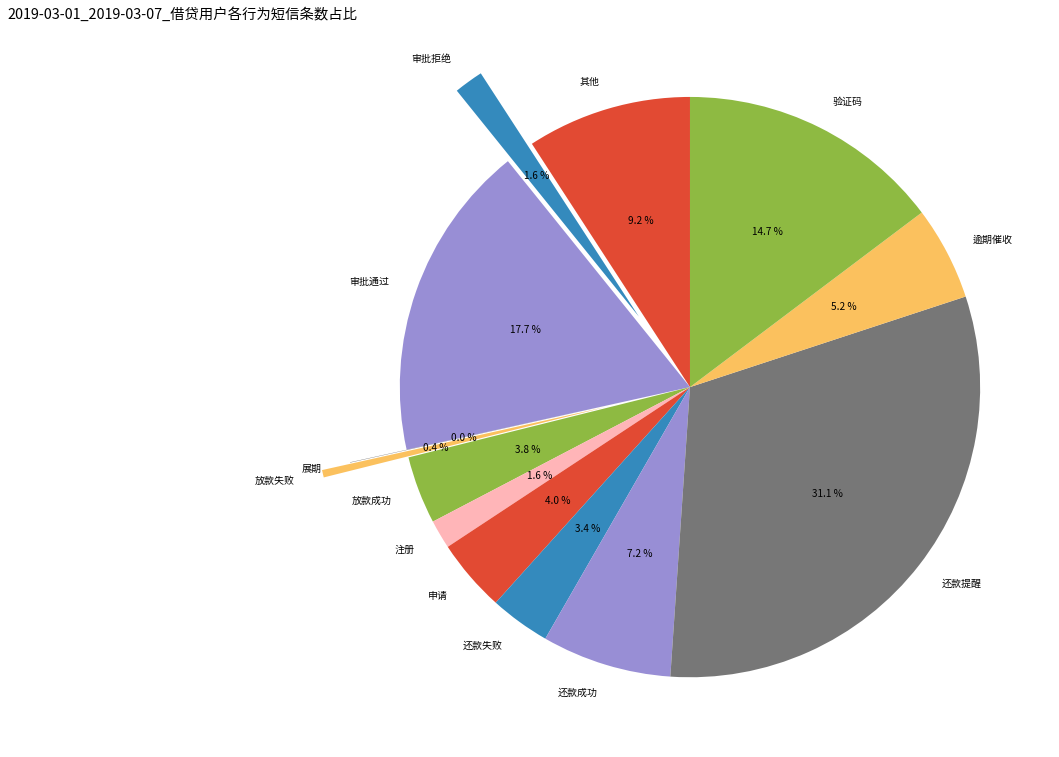

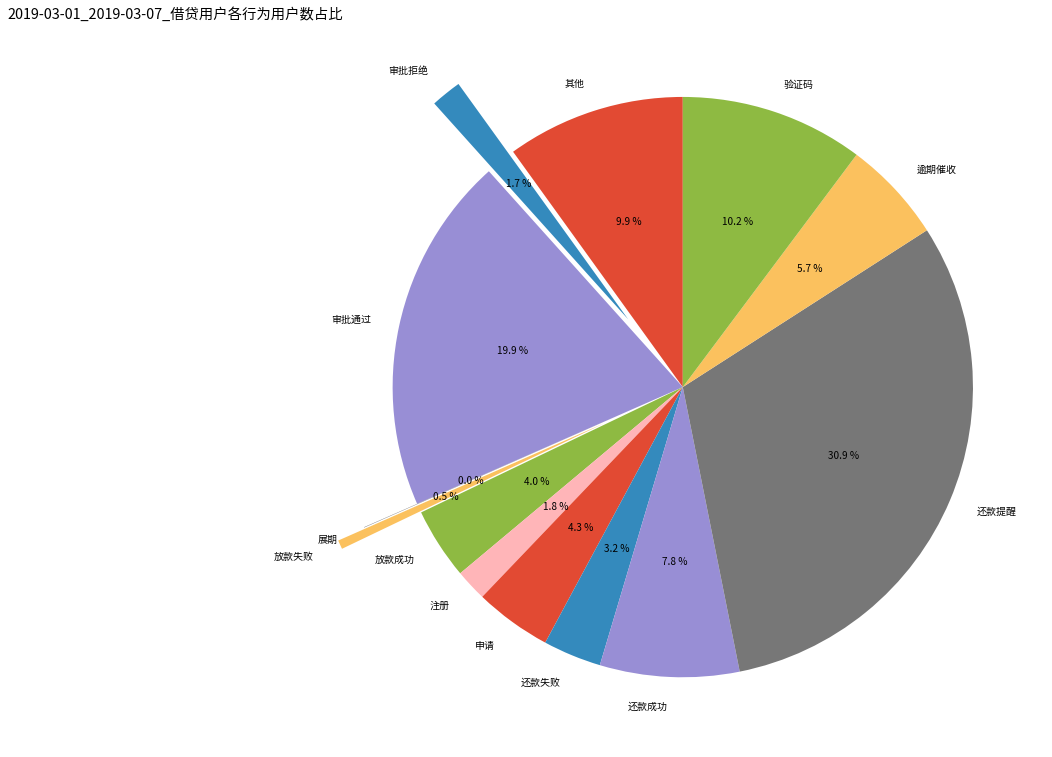

In [462]:
plt.figure(2,figsize=(13,18))#将画布设定为正方形，则绘制的饼图是正圆
plt.axes(aspect=1) 
plt.title(f'{dt_start}_{dt_end}_借贷用户各行为短信条数占比',x = -0.2)#绘制标题
explode = (0.0 , 0.3 , 0.0, 0.2 , 0.3 ,0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0, 0.0)
plt.pie(x = df_category_loan_3['total_num'],labels=df_category_loan_3['三级分类含义'],autopct='%3.1f %%',labeldistance=1.1, startangle=90, pctdistance=0.6,explode = explode)
plt.show()
plt.figure(2,figsize=(13,18))#将画布设定为正方形，则绘制的饼图是正圆
plt.axes(aspect=1) 
plt.title(f'{dt_start}_{dt_end}_借贷用户各行为用户数占比',x = -0.2)#绘制标题
explode = (0.0 , 0.3 , 0.0, 0.2 , 0.3 ,0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0, 0.0)
plt.pie(x = df_category_loan_3['unique_num'],labels=df_category_loan_3['三级分类含义'],autopct='%3.1f %%',labeldistance=1.1, startangle=90, pctdistance=0.6,explode = explode)
plt.show()

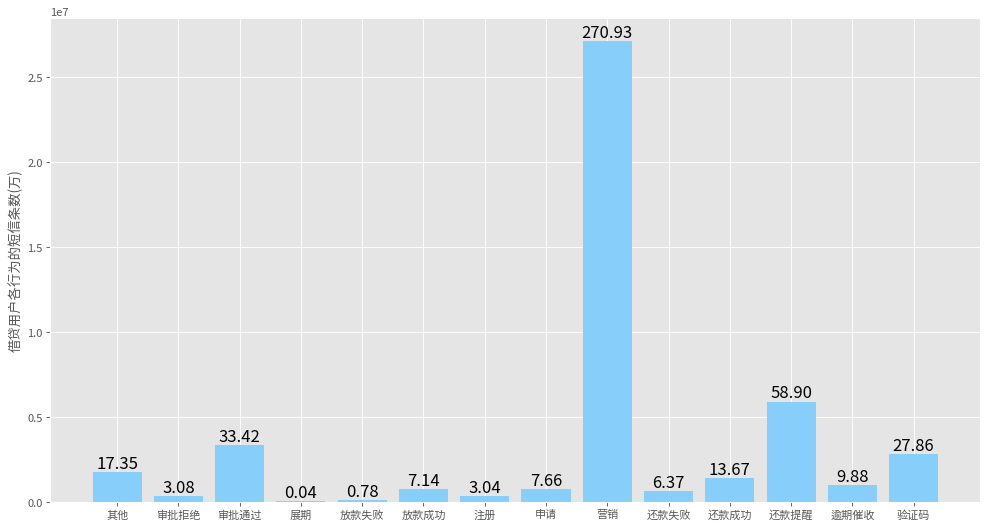

In [463]:
plt.figure(figsize=(15, 8), dpi=80)
plt.bar(df_category_loan_3_all['三级分类含义'],df_category_loan_3_all['total_num'],color = "#87CEFA")
plt.ylabel(u'借贷用户各行为的短信条数(万)')
for a,b in zip(df_category_loan_3_all['三级分类含义'],df_category_loan_3_all['total_num']):
    plt.text(a, b-0.3,'%.2f'%round(b/100000,3), ha = 'center',va = 'bottom',fontsize=15)
# plt.savefig(f'result_picture/{date_start}_{date_end}_信用卡用户各行为的短信条数', dpi=300)

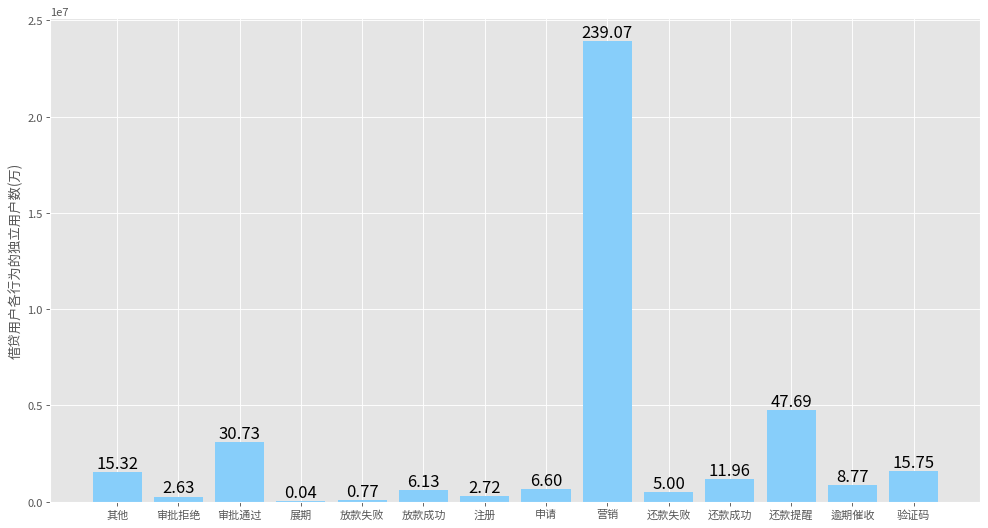

In [464]:
plt.figure(figsize=(15, 8), dpi=80)
plt.bar(df_category_loan_3_all['三级分类含义'],df_category_loan_3_all['unique_num'],color = "#87CEFA")
plt.ylabel(u'借贷用户各行为的独立用户数(万)')
for a,b in zip(df_category_loan_3_all['三级分类含义'],df_category_loan_3_all['unique_num']):
    plt.text(a, b-0.3,'%.2f'%round(b/100000,3), ha = 'center',va = 'bottom',fontsize=15)
# plt.savefig(f'result_picture/{date_start}_{date_end}_信用卡用户各行为的短信条数', dpi=300)

# 信贷数据

In [191]:
df_category_credit  = df_category_credit_card.append(df_category_loan).sort_values('dt').reset_index(drop = True)

In [501]:
df_category_credit_3_all = df_category_credit.groupby(['三级分类含义']).agg('sum')[['total_num','unique_num']].reset_index()
df_category_credit_3_all['week'] = dt_start
df_category_credit_3 = df_category_credit_3_all[df_category_credit_3_all['三级分类含义']!='营销'].reset_index()

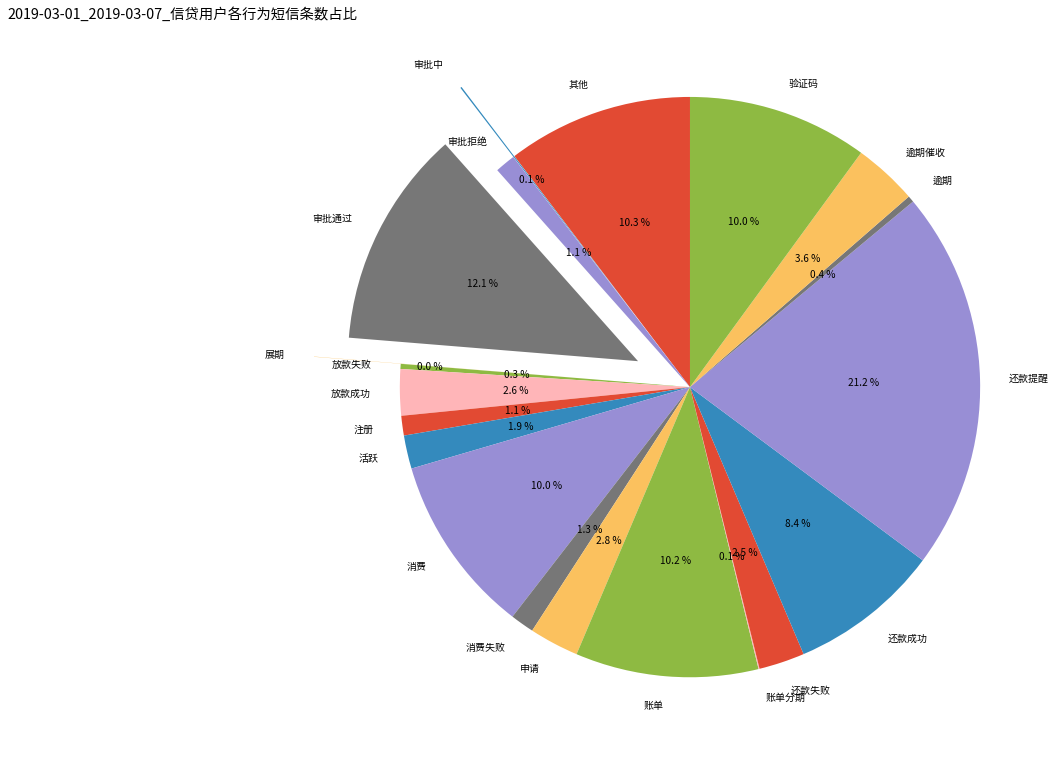

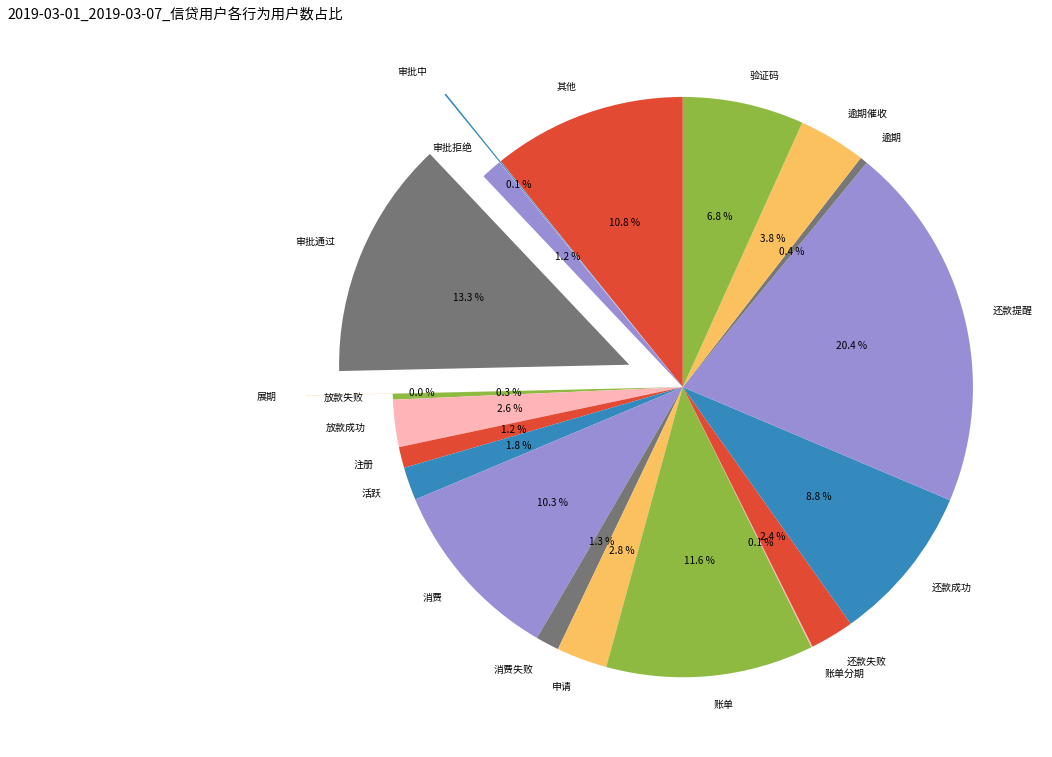

In [502]:
plt.figure(2,figsize=(13,18))#将画布设定为正方形，则绘制的饼图是正圆
plt.axes(aspect=1) 
plt.title(f'{dt_start}_{dt_end}_信贷用户各行为短信条数占比',x = -0.2)#绘制标题
explode = (0.0 , 0.3 , 0.0, 0.2 , 0.3 ,0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0, 0.0,0.0,0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0)
plt.pie(x = df_category_credit_3['total_num'],labels=df_category_credit_3['三级分类含义'],autopct='%3.1f %%',labeldistance=1.1, startangle=90, pctdistance=0.6,explode = explode)
plt.show()
plt.figure(2,figsize=(13,18))#将画布设定为正方形，则绘制的饼图是正圆
plt.axes(aspect=1) 
plt.title(f'{dt_start}_{dt_end}_信贷用户各行为用户数占比',x = -0.2)#绘制标题
explode = (0.0 , 0.3 , 0.0, 0.2 , 0.3 ,0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0, 0.0,0.0,0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0)
plt.pie(x = df_category_credit_3['unique_num'],labels=df_category_credit_3['三级分类含义'],autopct='%3.1f %%',labeldistance=1.1, startangle=90, pctdistance=0.6,explode = explode)
plt.show()

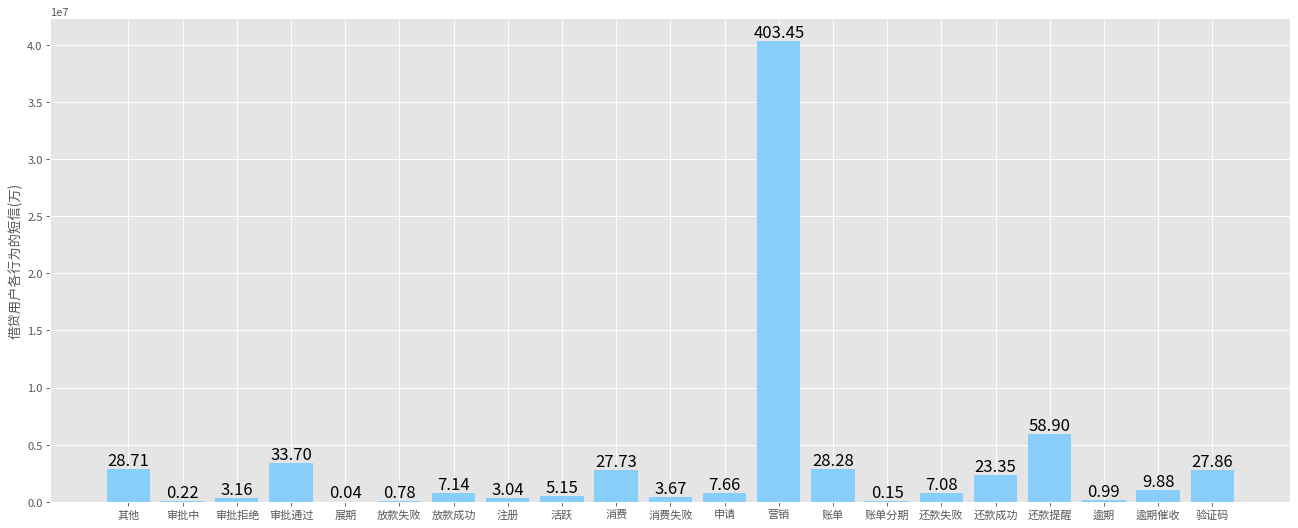

In [503]:
plt.figure(figsize=(20, 8), dpi=80)
plt.bar(df_category_credit_3_all['三级分类含义'],df_category_credit_3_all['total_num'],color = "#87CEFA")
plt.ylabel(u'借贷用户各行为的短信(万)')
for a,b in zip(df_category_credit_3_all['三级分类含义'],df_category_credit_3_all['total_num']):
    plt.text(a, b-0.3,'%.2f'%round(b/100000,3), ha = 'center',va = 'bottom',fontsize=15)
# plt.savefig(f'result_picture/{date_start}_{date_end}_信用卡用户各行为的短信条数', dpi=300)

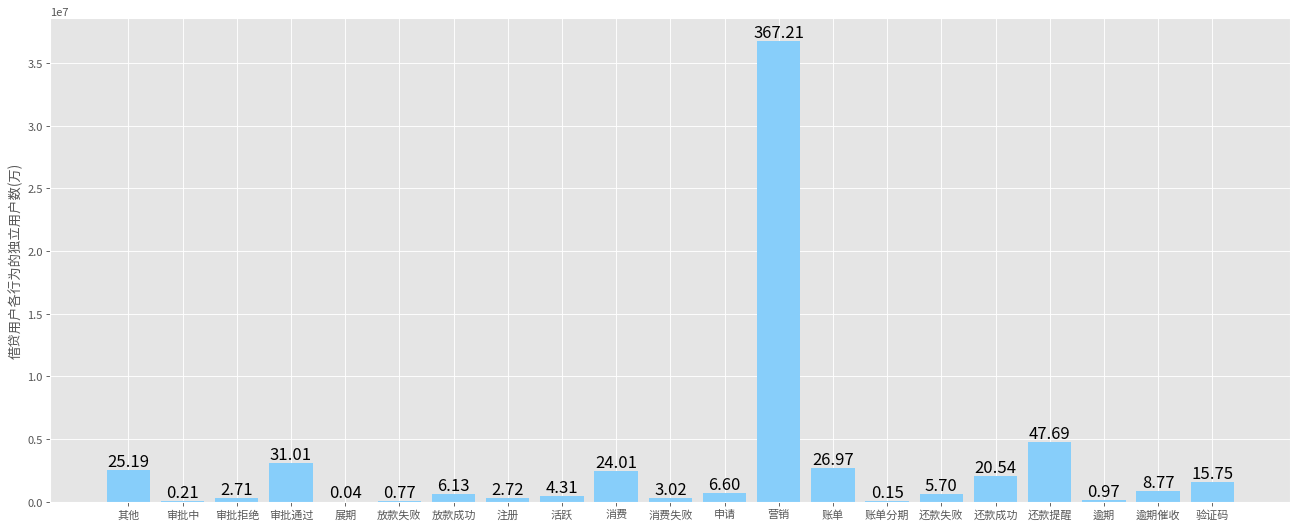

In [504]:
plt.figure(figsize=(20, 8), dpi=80)
plt.bar(df_category_credit_3_all['三级分类含义'],df_category_credit_3_all['unique_num'],color = "#87CEFA")
plt.ylabel(u'借贷用户各行为的独立用户数(万)')
for a,b in zip(df_category_credit_3_all['三级分类含义'],df_category_credit_3_all['unique_num']):
    plt.text(a, b-0.3,'%.2f'%round(b/100000,3), ha = 'center',va = 'bottom',fontsize=15)
# plt.savefig(f'result_picture/{date_start}_{date_end}_信用卡用户各行为的短信条数', dpi=300)

# 保险数据

In [193]:
df_category_baoxian = df_category_import[(df_category_import['category_2']=='business_insurance') & (df_category_import['dt'] == dt_mon)].reset_index(drop = True)

In [505]:
df_category_baoxian_3 = df_category_baoxian.groupby(['三级分类含义']).agg('sum')[['total_num','unique_num']].reset_index()
df_category_baoxian_3['week'] = dt_start
# df_category_baoxian_3 = df_category_baoxian_3_all[df_category_baoxian_3_all['三级分类含义']!='营销'].reset_index()

In [506]:
df_category_baoxian_3

,三级分类含义,total_num,unique_num,week
0,其他,479630,407050,2019-03-01
1,活跃,794823,661371,2019-03-01
2,理赔,88460,71731,2019-03-01
3,缴费,733575,687611,2019-03-01
4,营销,3221396,2874375,2019-03-01


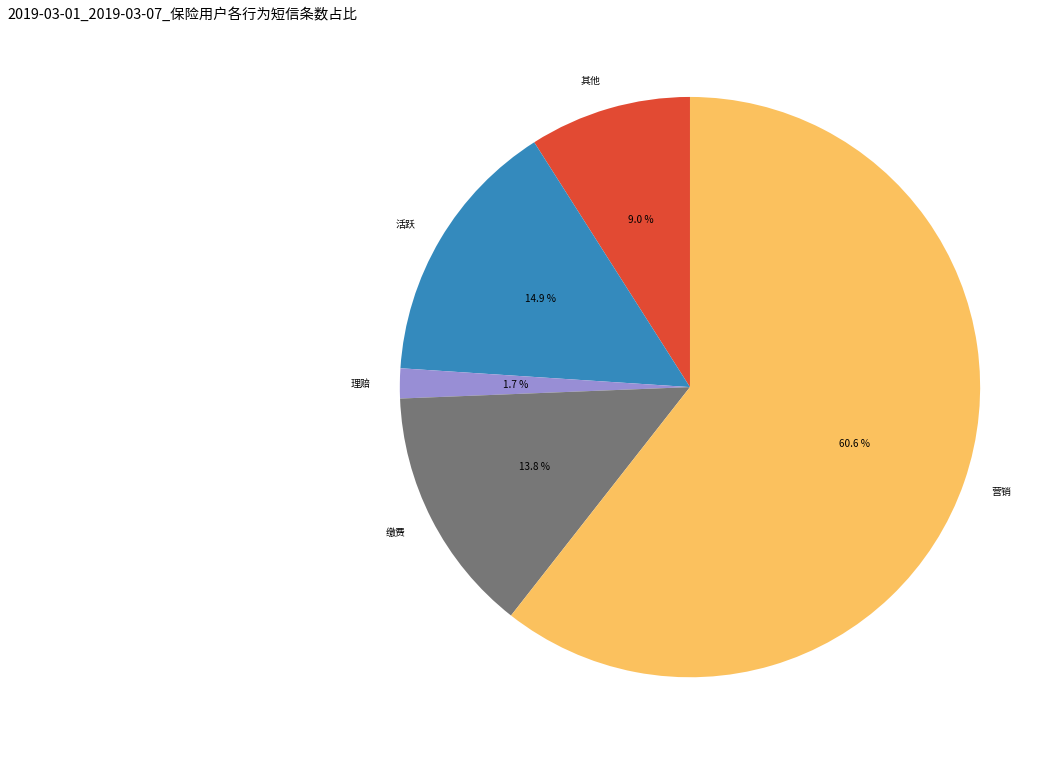

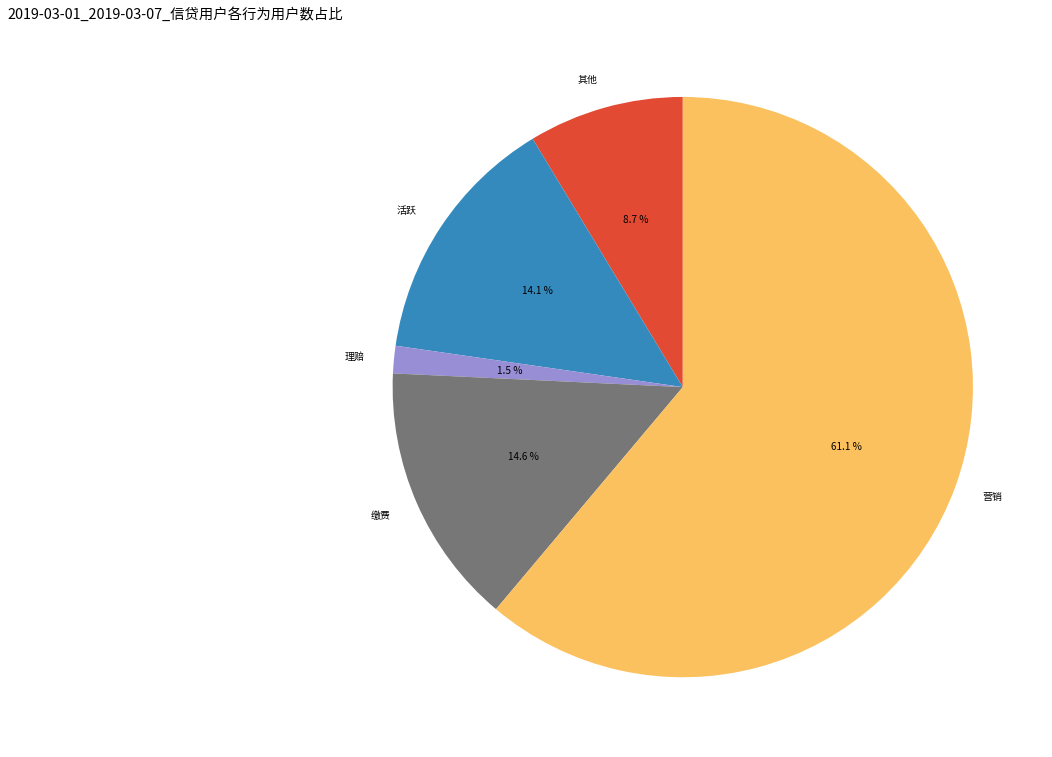

In [507]:
plt.figure(2,figsize=(13,18))#将画布设定为正方形，则绘制的饼图是正圆
plt.axes(aspect=1) 
plt.title(f'{dt_start}_{dt_end}_保险用户各行为短信条数占比',x = -0.2)#绘制标题
explode = (0.0 , 0.0 , 0.0, 0.0, 0.0)
plt.pie(x = df_category_baoxian_3['total_num'],labels=df_category_baoxian_3['三级分类含义'],autopct='%3.1f %%',labeldistance=1.1, startangle=90, pctdistance=0.6,explode = explode)
plt.show()
plt.figure(2,figsize=(13,18))#将画布设定为正方形，则绘制的饼图是正圆
plt.axes(aspect=1) 
plt.title(f'{dt_start}_{dt_end}_信贷用户各行为用户数占比',x = -0.2)#绘制标题
explode = (0.0 , 0.0 , 0.0, 0.0 , 0.0)
plt.pie(x = df_category_baoxian_3['unique_num'],labels=df_category_baoxian_3['三级分类含义'],autopct='%3.1f %%',labeldistance=1.1, startangle=90, pctdistance=0.6,explode = explode)
plt.show()

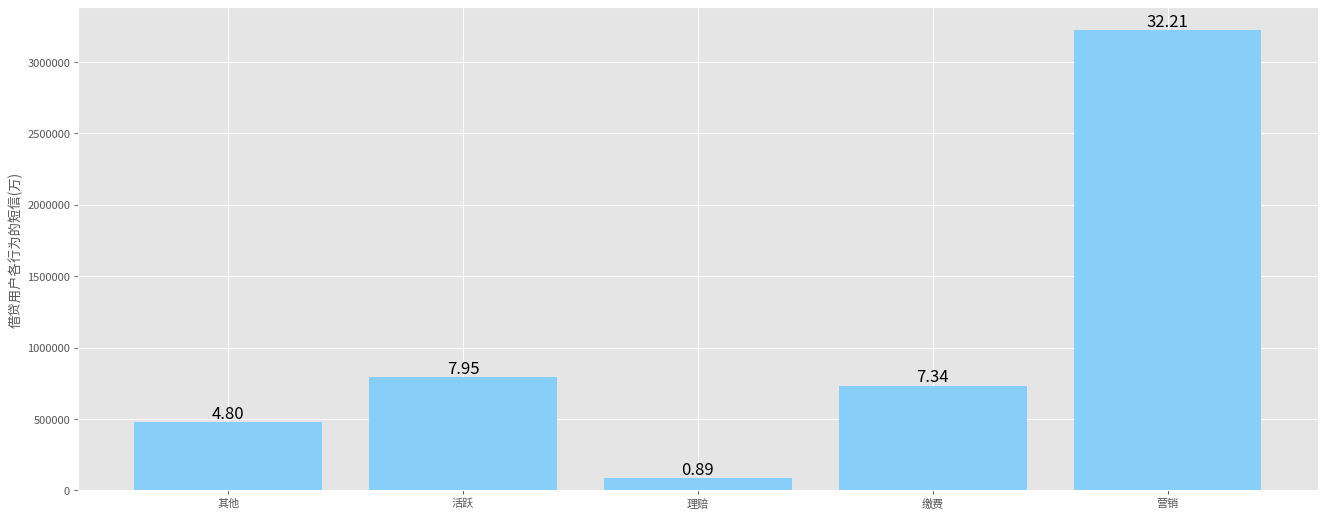

In [492]:
plt.figure(figsize=(20, 8), dpi=80)
plt.bar(df_category_baoxian_3['三级分类含义'],df_category_baoxian_3['total_num'],color = "#87CEFA")
plt.ylabel(u'保险用户各行为的短信(万)')
for a,b in zip(df_category_baoxian_3['三级分类含义'],df_category_baoxian_3['total_num']):
    plt.text(a, b-0.3,'%.2f'%round(b/100000,3), ha = 'center',va = 'bottom',fontsize=15)
# plt.savefig(f'result_picture/{date_start}_{date_end}_信用卡用户各行为的短信条数', dpi=300)

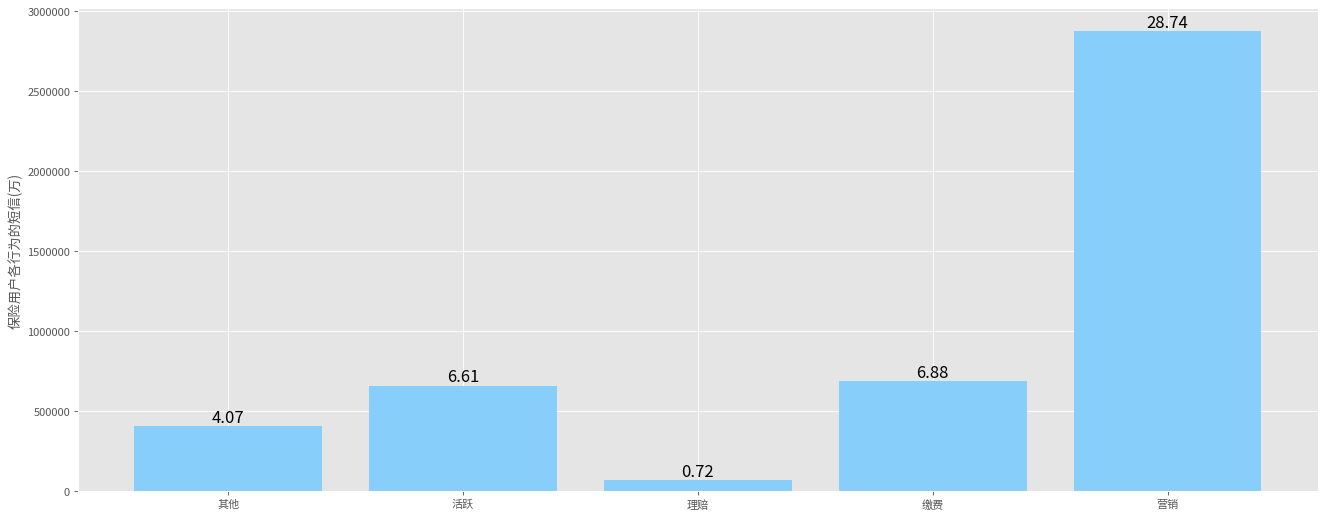

In [494]:
plt.figure(figsize=(20, 8), dpi=80)
plt.bar(df_category_baoxian_3['三级分类含义'],df_category_baoxian_3['unique_num'],color = "#87CEFA")
plt.ylabel(u'保险用户各行为的短信(万)')
for a,b in zip(df_category_baoxian_3['三级分类含义'],df_category_baoxian_3['unique_num']):
    plt.text(a, b-0.3,'%.2f'%round(b/100000,3), ha = 'center',va = 'bottom',fontsize=15)
# plt.savefig(f'result_picture/{date_start}_{date_end}_信用卡用户各行为的短信条数', dpi=300)

In [508]:
with pd.ExcelWriter('result_excel/baseline_2_3.xlsx') as writer:
    df_category_baoxian_3.to_excel(writer, sheet_name='保险',index = False)
    df_category_credit_3_all.to_excel(writer, sheet_name='信贷',index = False)
    df_category_credit_card_3_all.to_excel(writer, sheet_name='信用卡',index = False)
    df_category_loan_3_all.to_excel(writer, sheet_name='借贷',index = False)
    df_category_import_week1.to_excel(writer, sheet_name='二级分类按周统计',index = False)

In [510]:
df_category_other_import = df_category[df_category['category_2'].isin(other_import)]

In [511]:
df_category_other_import

,category_2,category_3,total_num,unique_num,table_name,dt
10,taxi,1,1040929,939574,gdl_jrs_msg_parse,2019-03-01
14,games,7,18655,16267,gdl_jrs_msg_parse,2019-03-01
15,yys,9,242416697,187508743,gdl_jrs_msg_parse,2019-03-01
17,taxi,7,1021,987,gdl_jrs_msg_parse,2019-03-01
18,chat,0,594432,528323,gdl_jrs_msg_parse,2019-03-01
...,...,...,...,...,...,...
94496,chat,7,14105,13449,gdl_jrs_msg_parse,2020-09-11
94516,onlineshopping,7,886652,731926,gdl_jrs_msg_parse,2020-09-11
94520,hotel,1,2911399,2323688,gdl_jrs_msg_parse,2020-09-11
94530,yys,16,7133712,6612352,gdl_jrs_msg_parse,2020-09-11
